In [36]:
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
order_details = pd.read_csv("order_details.csv")
orders = pd.read_csv("orders.csv")
pizzas = pd.read_csv("pizzas.csv")
pizza_types = pd.read_csv("pizza_types.csv", encoding= 'latin1')

In [38]:
df = order_details.merge(orders, on="order_id")
df = df.merge(pizzas, on="pizza_id")
df = df.merge(pizza_types, on="pizza_type_id")

#Total Revenue

In [39]:
df["revenue"] = df["quantity"] * df["price"]
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [40]:
df["revenue"].sum()

np.float64(817860.05)

#Total quantity

In [41]:
df["quantity"].sum()

np.int64(49574)

#Total orders sold

In [42]:
df["order_id"]

,order_id
0,1
1,2
2,2
3,2
4,2
...,...
48615,21348
48616,21348
48617,21348
48618,21349


In [43]:
df["order_id"].drop_duplicates().shape[0]


21350

#Pizza types that are sold
For python to see pizza types, the column has to be clean first

In [44]:
df.columns = df.columns.str.strip()

In [45]:
print(df.columns.tolist())

['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time', 'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients', 'revenue']


In [46]:
df["pizza_type_id"].drop_duplicates()

,pizza_type_id
0,hawaiian
1,classic_dlx
2,five_cheese
3,ital_supr
4,mexicana
5,thai_ckn
7,prsc_argla
10,bbq_ckn
11,the_greek
12,spinach_supr


In [47]:
df["pizza_type_id"].drop_duplicates().shape

(32,)

#Average price of pizza

In [48]:
print(df["price"].dtype)

float64


In [49]:
average_price = df["price"].mean()

In [50]:
print("Average price of pizzas:",)
round(average_price, 2)

Average price of pizzas:


np.float64(16.49)

#Peak of hours

In [51]:
#using the time column

#convert time column to datetime

orders["time"] = pd.to_datetime(orders["time"])

/tmp/ipython-input-816436482.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["time"] = pd.to_datetime(orders["time"])


In [52]:
#Extract hour

orders["hour"] = orders["time"].dt.hour

In [53]:
#count orders per hour

orders_per_hour = orders.groupby("hour") ["order_id"].count()

orders_per_hour

,order_id
hour,
9,1
10,8
11,1231
12,2520
13,2455
14,1472
15,1468
16,1920
17,2336


In [54]:
peak_hour = orders_per_hour.idxmax()
peak_hour

np.int32(12)

#Total sales made each day of the week

In [55]:
df["revenue"] = df["quantity"] * df["price"]

In [56]:
#convert date and Extract

df["date"] = pd.to_datetime(df["date"])
df["day"] = df["date"].dt.day_name()

In [57]:
#calculate total sales per day

sales_per_day = df.groupby("day") ["revenue"].sum()

sales_per_day

,revenue
day,
Friday,136073.90
Monday,107329.55
Saturday,123182.40
Sunday,99203.50
Thursday,123528.50
Tuesday,114133.80
Wednesday,114408.40


In [58]:
#Day with highest sales

best_day = sales_per_day.idxmax()

highest_sales = sales_per_day.max()

print(best_day, highest_sales)

Friday 136073.9


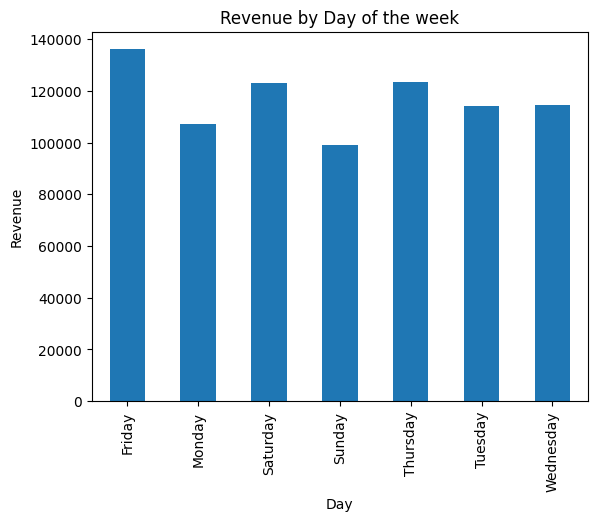

In [59]:
plt.figure()
sales_per_day.plot(kind="bar")
plt.title("Revenue by Day of the week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

#QUESTION 8

In [60]:
Top_5_pizza =(df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5))

print(top_5_pizza)

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


#QUESTION 9

Find the sales made in each month. Any trend noticeable?

In [61]:
df["month"] = df["date"].dt.month_name()


In [62]:
monthly_sales = df.groupby("month")["revenue"].sum()

monthly_sales

,revenue
month,
April,68736.80
August,68278.25
December,64701.15
February,65159.60
January,69793.30
July,72557.90
June,68230.20
March,70397.10
May,71402.75


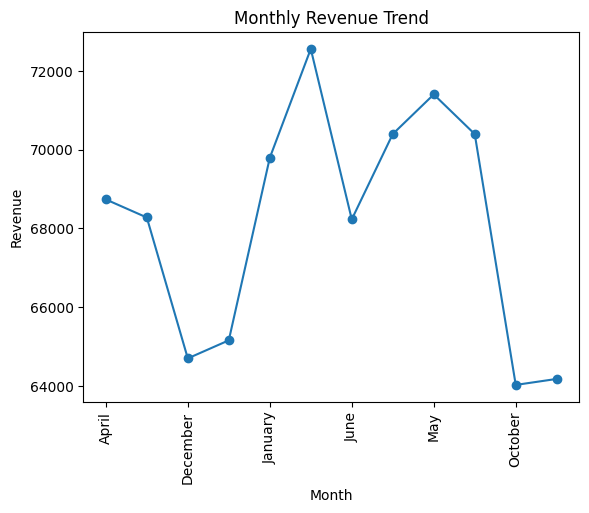

In [63]:
plt.figure()
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

#Noticeable Trend

peak Month is Jul, September and October(lowest dip)Sales fluctuate month to month.

Mid-year spike Q3 dip

#Question 10

Are there pizza types that are not doing well on the menu?

In [64]:
worst_5_pizzas = df.groupby("name")["quantity"].sum().sort_values().head(5)

worst_5_pizzas

,quantity
name,
The Brie Carre Pizza,490
The Mediterranean Pizza,934
The Calabrese Pizza,937
The Spinach Supreme Pizza,950
The Soppressata Pizza,961
